## Data Analysis and Data Visualization

In [129]:
import pandas as pd
import plotnine as p9
import numpy as np
from plotnine import *
from scipy import stats

In [130]:
feature_var = ['total_word_count','avg_word_length', 'avg_sentence_length','TTR', 'stop_word_count', 'unique_word_count', 'rare_word_count','avg_sentence_length.1',  'avg_parse_tree_depth','parse_tree_depth_variation', 'avg_adjectives_per_sentence', 'avg_adverbs_per_sentence',      'avg_verbs_per_sentence', 'avg_nouns_per_sentence', "0", 'flesch_reading_ease',  'flesch_kincaid_grade_level',' smog_index',  'sentiment_polarity','sentiment.subjectivity',    'perplexity']

In [131]:
df = pd.read_excel("../cleanData/featuresAsap.xlsx")
df.columns

Index([               'Unnamed: 0.1',                  'Unnamed: 0',
                          'essay_id',                   'essay_set',
                             'essay',                      'ai_llm',
                      'ai_generated',                 'word_tokens',
                   'sentence_tokens',      'lemmatized_word_tokens',
                  'total_word_count',             'avg_word_length',
               'avg_sentence_length',                         'TTR',
                   'stop_word_count',           'unique_word_count',
                         'word_freq',                 'bigram_freq',
                      'trigram_freq',             'rare_word_count',
             'avg_sentence_length.1',        'avg_parse_tree_depth',
        'parse_tree_depth_variation', 'avg_adjectives_per_sentence',
          'avg_adverbs_per_sentence',      'avg_verbs_per_sentence',
            'avg_nouns_per_sentence',                             0,
               'flesch_reading_eas

In [132]:
df_fig = df.drop(["Unnamed: 0.1", "Unnamed: 0", "essay_id", "essay_set", "essay", "ai_llm", 'word_tokens',  'sentence_tokens',  'lemmatized_word_tokens',  "word_freq", "bigram_freq", "trigram_freq", 0], axis = 1)
df_fig.columns

Index(['ai_generated', 'total_word_count', 'avg_word_length',
       'avg_sentence_length', 'TTR', 'stop_word_count', 'unique_word_count',
       'rare_word_count', 'avg_sentence_length.1', 'avg_parse_tree_depth',
       'parse_tree_depth_variation', 'avg_adjectives_per_sentence',
       'avg_adverbs_per_sentence', 'avg_verbs_per_sentence',
       'avg_nouns_per_sentence', 'flesch_reading_ease',
       'flesch_kincaid_grade_level', 'smog_index', 'sentiment_polarity',
       'sentiment.subjectivity', 'perplexity'],
      dtype='object')

In [133]:
means = df.drop(["Unnamed: 0.1", "Unnamed: 0", "essay_id", "essay_set", "essay", "ai_llm", "word_freq", "bigram_freq", "trigram_freq", 0], axis = 1).groupby(["ai_generated"]).mean().T
means

ai_generated,0,1
total_word_count,254.365455,249.663970
avg_word_length,3.940145,4.319662
avg_sentence_length,20.488947,20.147229
TTR,0.550562,0.536543
stop_word_count,115.831608,109.614088
unique_word_count,78.012214,96.549039
rare_word_count,78.012214,96.549039
avg_sentence_length.1,20.546746,22.653885
avg_parse_tree_depth,5.046980,5.757604
parse_tree_depth_variation,1.662167,1.834155


In [134]:
#remove outliers to make graph better
df_fig = df_fig[(np.abs(stats.zscore(df_fig)) < 3).all(axis=1)]

In [135]:
df_fig = df_fig.rename(columns = {
  'total_word_count': "Word Count",
        'avg_word_length': "Avg. Word Length",
        'avg_sentence_length': "Avg. Sentence Length",
        'TTR': "Type-Token Ratio",
        'stop_word_count': "Stop Word Count",
        'unique_word_count': "Unique Word Count",
        'word_freq': "Avg. Word Frequency",
        'rare_word_count': "Rare Word Count",
        "avg_sentence_length.1" : "Avg. Sentence Length",
        "avg_parse_tree_depth" : "Avg. Tree Depth",
        "parse_tree_depth_variation" : "Tree Depth Variation",
        "avg_adjectives_per_sentence" : "Avg. Adjectives/Sentence",
        "avg_verbs_per_sentence" : "Avg. Verbs/Sentence",
        "avg_adverbs_per_sentence" : "Avg. Adverbs/Sentence",
        "avg_nouns_per_sentence" : "Avg. Nouns/Sentence",
        "flesch_reading_ease" : "Reading Ease",
        "flesch_kincaid_grade_level" : "Grade level",
        "smog_index" : "Smog Index",
        "sentiment_polarity" : "Polarity",
        "sentiment.subjectivity" : "Subjectivity",
        "perplexity" : "Perplexity"})

In [141]:
df_fig["ai_generated"] = df_fig["ai_generated"].replace({0: "Human", 1: "AI" })

In [137]:
df_long = pd.melt(df_fig,id_vars = ["ai_generated"], var_name = "feature", value_name = "value")
print(df_long.columns)
print(df_long.dtypes)

Index(['ai_generated', 'feature', 'value'], dtype='object')
ai_generated      int64
feature          object
value           float64
dtype: object


In [138]:
df_long["feature"]=df_long["feature"].astype('category')

In [145]:
df_long["ai_generated"] = df_long["ai_generated"].replace({0: "Human", 1: "AI" })

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

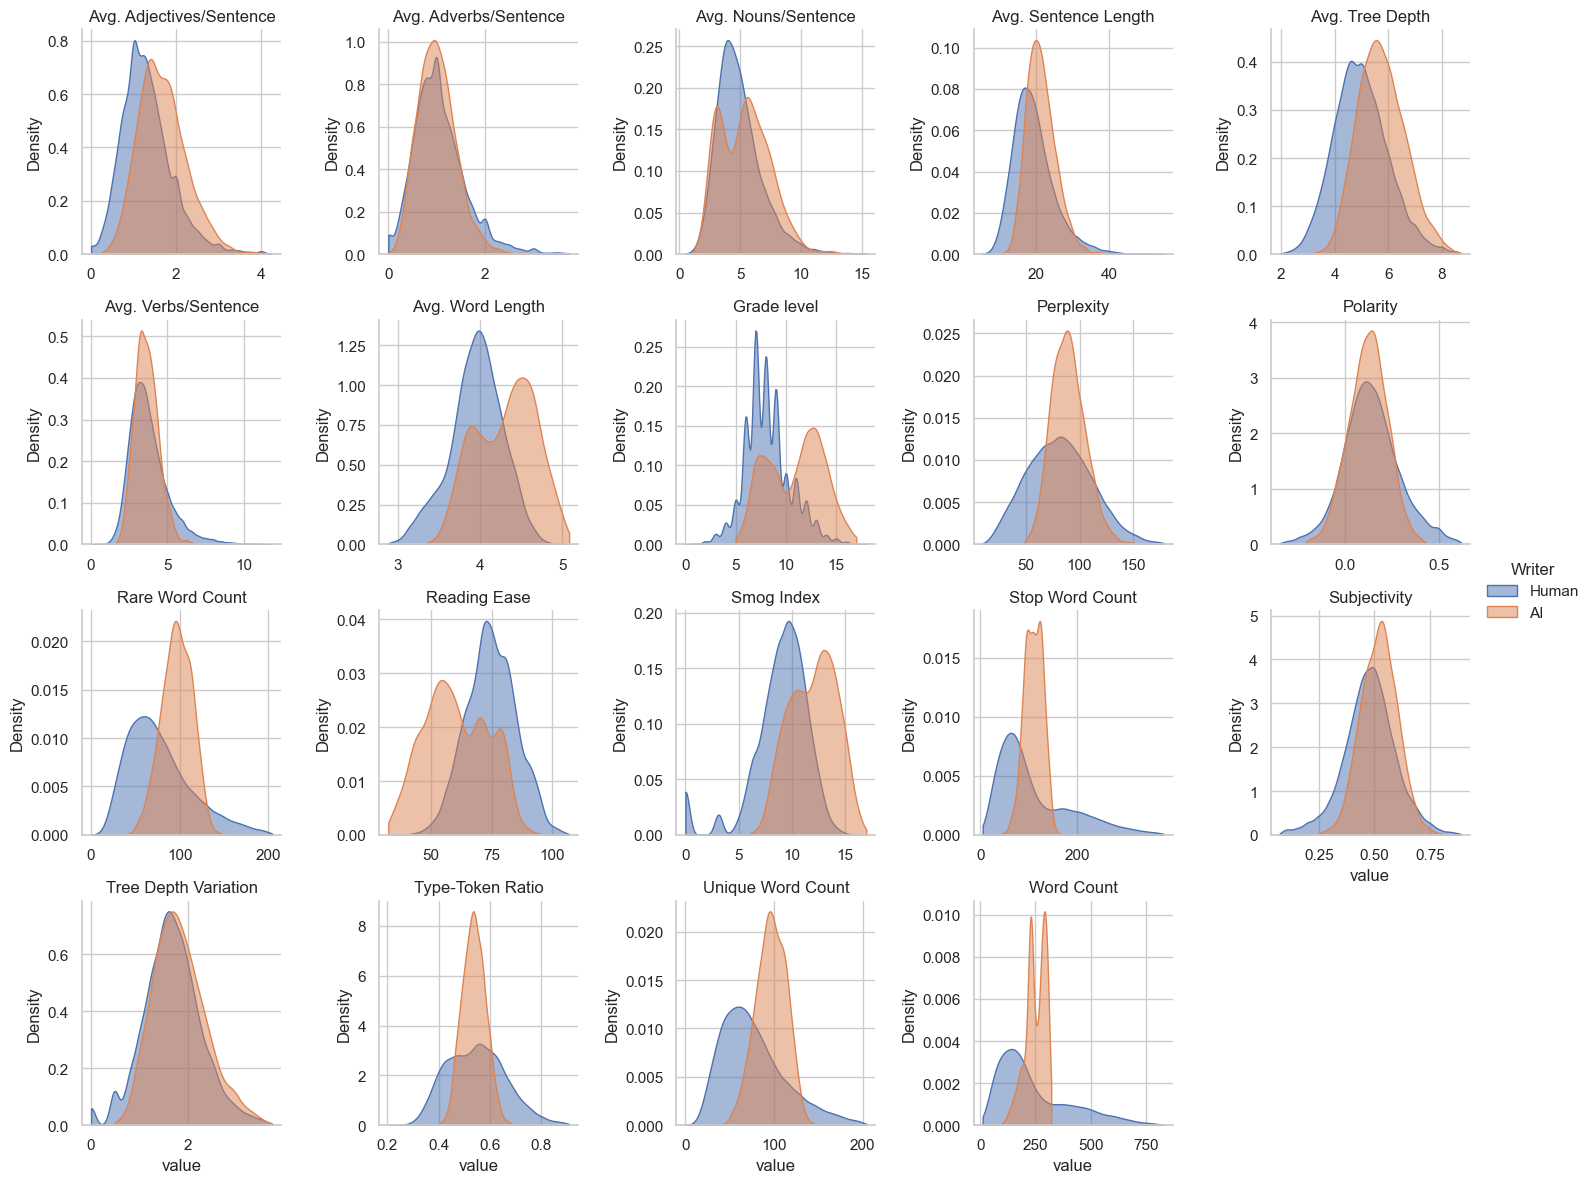

In [174]:
#almost all features

# set seaborn whitegrid theme
sns.set(style="whitegrid")

# using small multiple
# create a grid 
g = sns.FacetGrid(df_long, col='feature', hue='ai_generated', col_wrap=5, sharex = False, sharey = False)

# draw density plots
g = g.map(sns.kdeplot,"value", cut=0, fill=True, common_norm=False, alpha=0.5, legend=True, label = "ai_generated")

# control the title of each facet
g = g.set_titles("{col_name}")

g.add_legend(title = "Writer")

sns.FacetGrid.savefig(g, "../output/densityplot.png")

# show the graph
plt.show()


In [167]:
feature_var = df_long["feature"].unique()
#just keep first 10
df_subset = df_long[df_long['feature'].isin()]

df_subset = df_long.loc[df_long.apply(lambda x : x.feature in feature_var[0:10], axis= 1)]
#df2 = df.loc[df.apply(lambda x: x.Fee in [20000,22000], axis=1)]

TypeError: isin() missing 1 required positional argument: 'values'

In [187]:
df_subset1 = df_fig.loc[:, ['ai_generated', 'Word Count', 'Avg. Word Length', 'Avg. Sentence Length', 'Type-Token Ratio', 'Stop Word Count', 'Unique Word Count', 'Rare Word Count', 'Avg. Sentence Length']]
df_subset2 = df_fig.loc[:, ["ai_generated", 'Avg. Tree Depth', 'Tree Depth Variation', 'Avg. Adjectives/Sentence',
       'Avg. Adverbs/Sentence', 'Avg. Verbs/Sentence', 'Avg. Nouns/Sentence',
       'Reading Ease', 'Grade level', 'Smog Index', 'Polarity', 'Subjectivity',
       'Perplexity']]

df_subset1_long = pd.melt(df_subset1,id_vars = ["ai_generated"], var_name = "feature", value_name = "value")
df_subset2_long = pd.melt(df_subset2,id_vars = ["ai_generated"], var_name = "feature", value_name = "value")



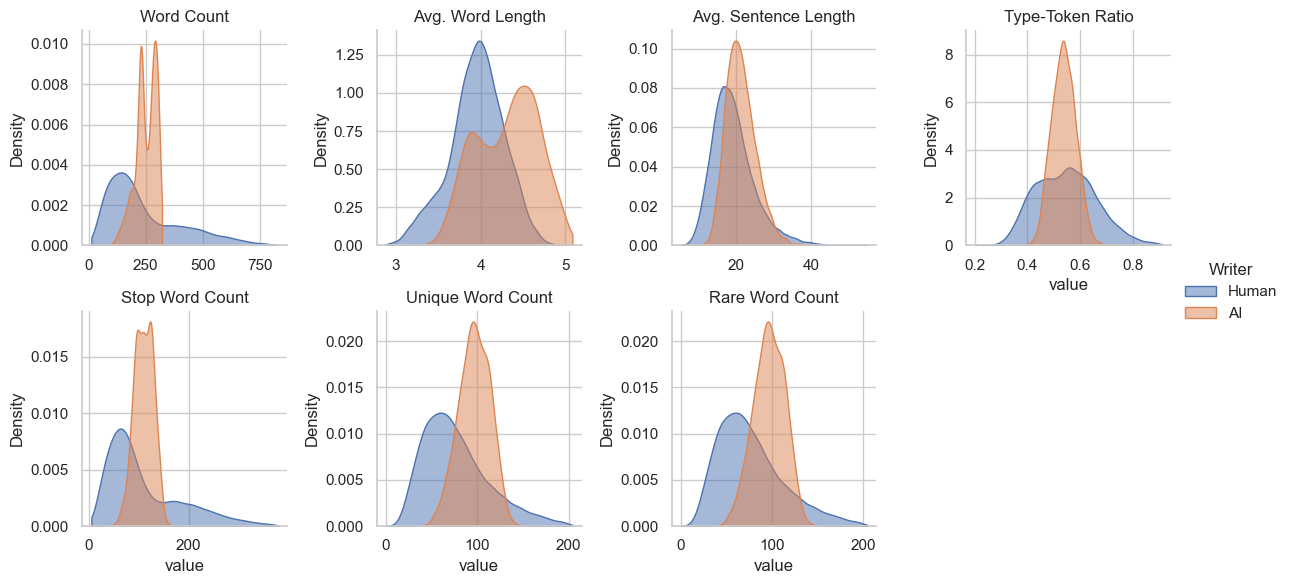

In [189]:
#First 10 features

# set seaborn whitegrid theme
sns.set(style="whitegrid")

# using small multiple
# create a grid 
g = sns.FacetGrid(df_subset1_long, col='feature', hue='ai_generated', col_wrap=4, sharex = False, sharey = False)

# draw density plots
g = g.map(sns.kdeplot,"value", cut=0, fill=True, common_norm=False, alpha=0.5, legend=True, label = "ai_generated")

# control the title of each facet
g = g.set_titles("{col_name}")

g.add_legend(title = "Writer")

sns.FacetGrid.savefig(g, "../output/densityplot_sub1.png")

# show the graph
plt.show()

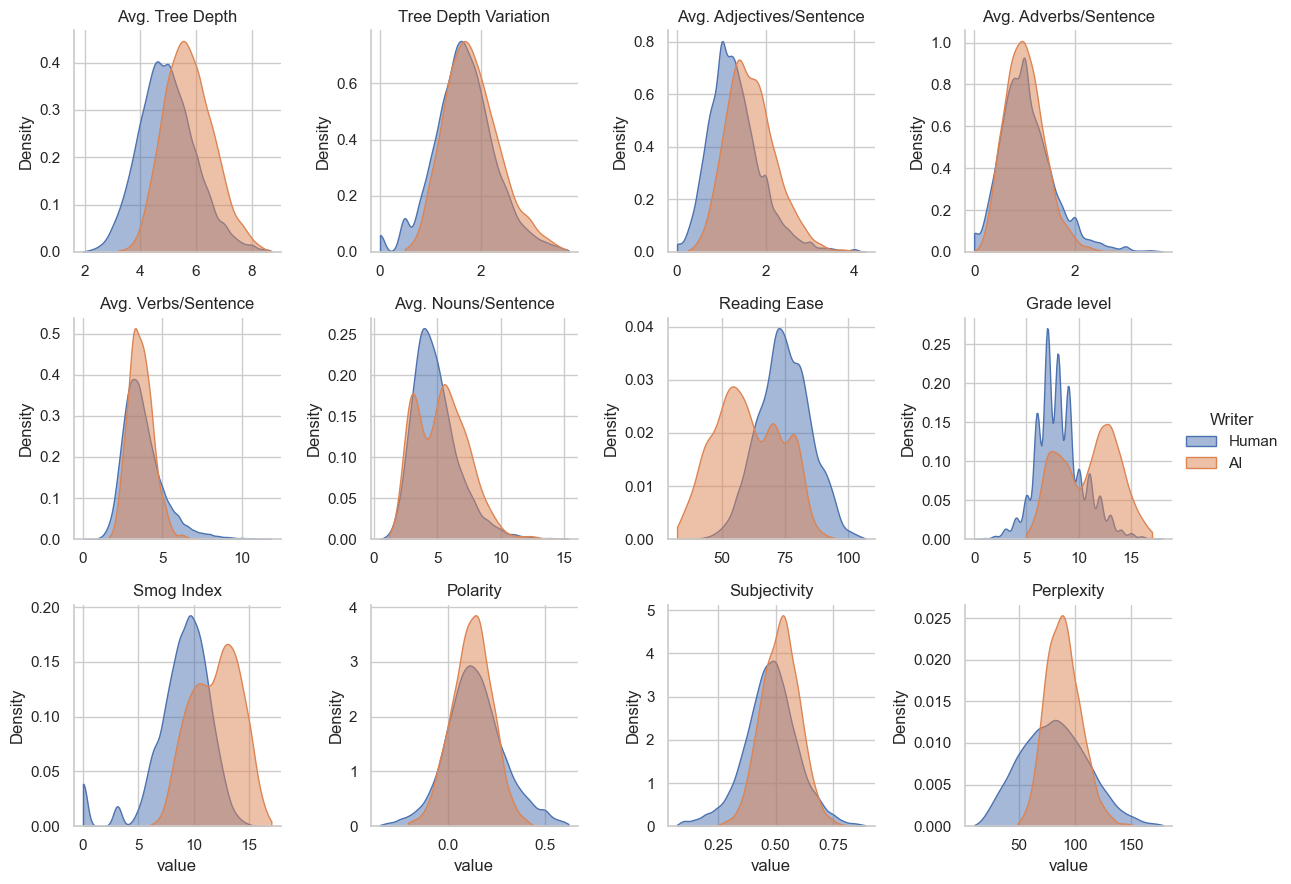

In [190]:
#last 10 features

# set seaborn whitegrid theme
sns.set(style="whitegrid")

# using small multiple
# create a grid 
g = sns.FacetGrid(df_subset2_long, col='feature', hue='ai_generated', col_wrap=4, sharex = False, sharey = False)

# draw density plots
g = g.map(sns.kdeplot,"value", cut=0, fill=True, common_norm=False, alpha=0.5, legend=True, label = "ai_generated")

# control the title of each facet
g = g.set_titles("{col_name}")

g.add_legend(title = "Writer")

sns.FacetGrid.savefig(g, "../output/densityplot_sub2.png")

# show the graph
plt.show()

In [162]:
df_long[df_long['feature'].isin(feature_var[0:10])]
#df[df['Fee'].isin(list_of_values)]

,ai_generated,feature,value
0,Human,Word Count,386.000000
1,Human,Word Count,464.000000
2,Human,Word Count,313.000000
3,Human,Word Count,611.000000
4,Human,Word Count,517.000000
...,...,...,...
239850,AI,Avg. Adjectives/Sentence,1.833333
239851,AI,Avg. Adjectives/Sentence,2.250000
239852,AI,Avg. Adjectives/Sentence,1.500000
239853,AI,Avg. Adjectives/Sentence,2.250000
